<a href="https://colab.research.google.com/github/carascott/1stproject/blob/main/SQlitehw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [108]:
import sqlite3
from collections import defaultdict

connection = sqlite3.connect('student_grades.db')

print("Database created and connected!")

Database created and connected!


In [109]:
cursor = connection.cursor()

print("Cursor created!")

Cursor created!


Question 2

In [110]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

print("Students table created!")

Students table created!


In [111]:
cursor.close()

print("Cursor closed!")

Cursor closed!


In [112]:
cursor = connection.cursor()

print("Cursor created!")
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

print("Students table created!")

Cursor created!
Students table created!


In [113]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')

print("Grades table created!")

Grades table created!


Question 3

In [114]:
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol','White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

connection.commit()

print("Data inserted into the students table!")

Data inserted into the students table!


In [115]:
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 75),
    (3, 'English', 81),
    (3, 'History', 85),
    (4, 'Math', 98),
    (4, 'English', 100),
    (4, 'History', 97),
    (5, 'Math', 88),
    (5, 'English', 90),
    (5, 'History',92)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)

connection.commit()

print("Data inserted into the grades table!")

Data inserted into the grades table!


In [116]:
cursor.execute("SELECT * FROM students")
rows = cursor.fetchall()

print("All students data:")
for row in rows:
    print(row)

All students data:
(1, 'Alice', 'Johnson')
(2, 'Bob', 'Smith')
(3, 'Csarol', 'White')
(4, 'David', 'Brown')
(5, 'Eve', 'Davis')
(6, 'Alice', 'Johnson')
(7, 'Bob', 'Smith')
(8, 'Csarol', 'White')
(9, 'David', 'Brown')
(10, 'Eve', 'Davis')
(11, 'Alice', 'Johnson')
(12, 'Bob', 'Smith')
(13, 'Carol', 'White')
(14, 'David', 'Brown')
(15, 'Eve', 'Davis')
(16, 'Alice', 'Johnson')
(17, 'Bob', 'Smith')
(18, 'Carol', 'White')
(19, 'David', 'Brown')
(20, 'Eve', 'Davis')
(21, 'Alice', 'Johnson')
(22, 'Bob', 'Smith')
(23, 'Carol', 'White')
(24, 'David', 'Brown')
(25, 'Eve', 'Davis')
(26, 'Alice', 'Johnson')
(27, 'Bob', 'Smith')
(28, 'Carol', 'White')
(29, 'David', 'Brown')
(30, 'Eve', 'Davis')
(31, 'Alice', 'Johnson')
(32, 'Bob', 'Smith')
(33, 'Carol', 'White')
(34, 'David', 'Brown')
(35, 'Eve', 'Davis')


In [102]:
cursor.execute("SELECT * FROM grades")
rows = cursor.fetchall()

print("All grades data:")
for row in rows:
    print(row)

All grades data:
(1, 1, 'Math', 95)
(2, 1, 'English', 88)
(3, 1, 'History', 90)
(4, 2, 'Math', 82)
(5, 2, 'English', 76)
(6, 2, 'History', 85)
(7, 3, 'Math', 75)
(8, 3, 'English', 81)
(9, 3, 'History', 85)
(10, 4, 'Math', 98)
(11, 4, 'English', 100)
(12, 4, 'History', 97)
(13, 5, 'Math', 88)
(14, 5, 'English', 90)
(15, 5, 'History', 92)
(16, 1, 'Math', 95)
(17, 1, 'English', 88)
(18, 1, 'History', 90)
(19, 2, 'Math', 82)
(20, 2, 'English', 76)
(21, 2, 'History', 85)
(22, 3, 'Math', 75)
(23, 3, 'English', 81)
(24, 3, 'History', 85)
(25, 4, 'Math', 98)
(26, 4, 'English', 100)
(27, 4, 'History', 97)
(28, 5, 'Math', 88)
(29, 5, 'English', 90)
(30, 5, 'History', 92)
(31, 1, 'Math', 95)
(32, 1, 'English', 88)
(33, 1, 'History', 90)
(34, 2, 'Math', 82)
(35, 2, 'English', 76)
(36, 2, 'History', 85)
(37, 3, 'Math', 75)
(38, 3, 'English', 81)
(39, 3, 'History', 85)
(40, 4, 'Math', 98)
(41, 4, 'English', 100)
(42, 4, 'History', 97)
(43, 5, 'Math', 88)
(44, 5, 'English', 90)
(45, 5, 'History', 92)

Question 4

In [103]:
# 1
cursor.execute('''
SELECT s.first_name, s.last_name, g.subject, g.grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
''')

results = cursor.fetchall()
for row in results:
    print(row)

('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Csarol', 'White', 'Math', 75)
('Csarol', 'White', 'English', 81)
('Csarol', 'White', 'History', 85)
('David', 'Brown', 'Math', 98)
('David', 'Brown', 'English', 100)
('David', 'Brown', 'History', 97)
('Eve', 'Davis', 'Math', 88)
('Eve', 'Davis', 'English', 90)
('Eve', 'Davis', 'History', 92)
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Csarol', 'White', 'Math', 75)
('Csarol', 'White', 'English', 81)
('Csarol', 'White', 'History', 85)
('David', 'Brown', 'Math', 98)
('David', 'Brown', 'English', 100)
('David', 'Brown', 'History', 97)
('Eve', 'Davis', 'Math', 88)
('Eve', 'Davis', 'English', 90)
('Eve', 'Davis', 'History', 92)
('Alice', 'Joh

In [77]:
# 2
cursor.execute('''
SELECT s.first_name, s.last_name, AVG(g.grade) AS average_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY s.student_id, s.first_name, s.last_name
''')

results = cursor.fetchall()

print("Student & Their Average Grade ")
print("")
for row in results:
    first_name, last_name, average_grade = row
    print(f"{first_name} {last_name}: {average_grade:.2f}")

Student & Their Average Grade 

Alice Johnson: 91.00
Bob Smith: 81.00
Csarol White: 80.33
David Brown: 98.33
Eve Davis: 90.00


In [78]:
# 3
cursor.execute('''
SELECT s.first_name, s.last_name, AVG(g.grade) AS average_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY s.student_id, s.first_name, s.last_name
ORDER BY average_grade DESC
LIMIT 1
''')

result = cursor.fetchall()

print("Student with the Highest Average Grade ")
print("")
print(f"{first_name} {last_name}: {average_grade:.2f}")

Student with the Highest Average Grade 

Eve Davis: 90.00


In [79]:
# 4
cursor.execute('''
SELECT AVG(g.grade) AS average_math_grade
FROM grades g
WHERE g.subject = 'Math'
''')

result = cursor.fetchone()
average_math_grade = result[0]
print("Average Math Grade:", average_math_grade)

Average Math Grade: 87.6


In [80]:
# 5
cursor.execute('''
SELECT DISTINCT s.first_name, s.last_name
FROM students s
JOIN grades g ON s.student_id = g.student_id
WHERE g.grade > 90
''')

results = cursor.fetchall()

if len(results) == 1:
    print("Student who scored above a 90 in a subject:")
else:
    print("Students who scored above a 90 in a subject:")
print("")

if results:
    for row in results:
        first_name, last_name = row
        print(f"{first_name} {last_name}")

Students who scored above a 90 in a subject:

Alice Johnson
David Brown
Eve Davis


Question 5

In [81]:
# 1
import pandas as pd

query_students = 'SELECT * FROM students'
query_grades = 'SELECT * FROM grades'

df_students = pd.read_sql_query(query_students, connection)
df_grades = pd.read_sql_query(query_grades, connection)

print("Students DataFrame:")
print(df_students)
print("\nGrades DataFrame:")
print(df_grades)

Students DataFrame:
    student_id first_name last_name
0            1      Alice   Johnson
1            2        Bob     Smith
2            3     Csarol     White
3            4      David     Brown
4            5        Eve     Davis
5            6      Alice   Johnson
6            7        Bob     Smith
7            8     Csarol     White
8            9      David     Brown
9           10        Eve     Davis
10          11      Alice   Johnson
11          12        Bob     Smith
12          13      Carol     White
13          14      David     Brown
14          15        Eve     Davis
15          16      Alice   Johnson
16          17        Bob     Smith
17          18      Carol     White
18          19      David     Brown
19          20        Eve     Davis

Grades DataFrame:
    grade_id  student_id  subject  grade
0          1           1     Math     95
1          2           1  English     88
2          3           1  History     90
3          4           2     Math     82


In [82]:
# 2
query = '''
SELECT s.first_name, s.last_name, g.subject, g.grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
'''

df_comb = pd.read_sql_query(query, connection)

print("Combined Tables DataFrame:")
print(df_comb)

Combined Tables DataFrame:
   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6      Csarol     White     Math     75
7      Csarol     White  English     81
8      Csarol     White  History     85
9       David     Brown     Math     98
10      David     Brown  English    100
11      David     Brown  History     97
12        Eve     Davis     Math     88
13        Eve     Davis  English     90
14        Eve     Davis  History     92
15      Alice   Johnson     Math     95
16      Alice   Johnson  English     88
17      Alice   Johnson  History     90
18        Bob     Smith     Math     82
19        Bob     Smith  English     76
20        Bob     Smith  History     85
21     Csarol     White     Math     75
22     Csarol     White  English     81
23     Csarol

In [83]:
# 3
sdf = pd.read_sql_query('SELECT * FROM students', connection)
sdf = df_comb.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()
sdf.columns = ['first_name', 'last_name', 'average_grade']
print(sdf.head())

gdf = pd.read_sql_query('SELECT * FROM grades', connection)
gdf = df_comb.groupby('subject')['grade'].mean().reset_index()
gdf.columns = ['subject', 'average_grade']
print(gdf.head())

import matplotlib.pyplot as plt

  first_name last_name  average_grade
0      Alice   Johnson      91.000000
1        Bob     Smith      81.000000
2     Csarol     White      80.333333
3      David     Brown      98.333333
4        Eve     Davis      90.000000
   subject  average_grade
0  English           87.0
1  History           89.8
2     Math           87.6


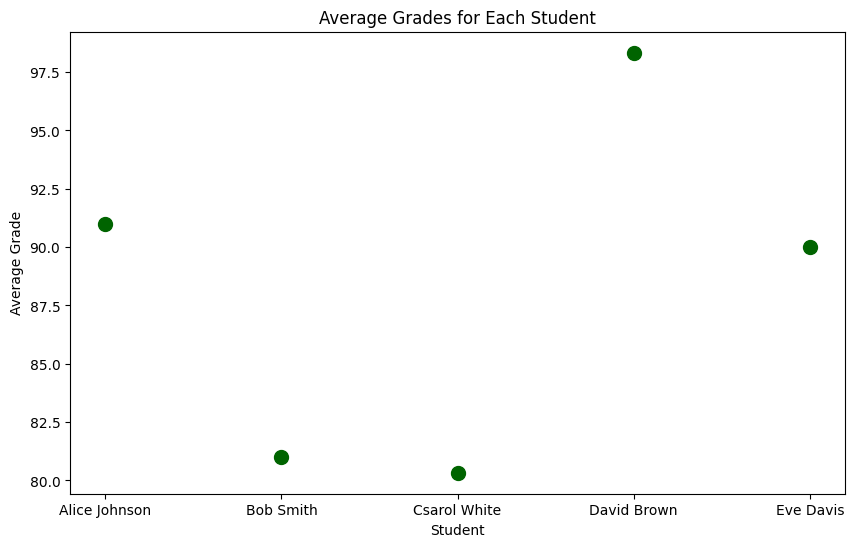

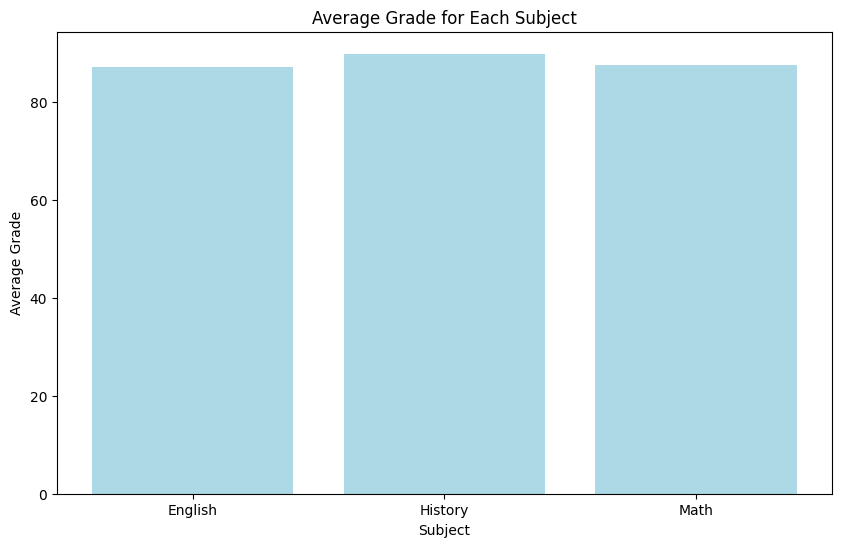

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(sdf['first_name'] + ' ' + sdf['last_name'], sdf['average_grade'], color='darkgreen', s=100)
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(gdf['subject'], gdf['average_grade'], color='lightblue')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.show()

In [89]:
# Bonus
query = '''
SELECT s.first_name, s.last_name, g.subject, g.grade
FROM grades g
JOIN students s ON g.student_id = s.student_id
ORDER BY g.subject, s.last_name, s.first_name;
'''

dfeach = pd.read_sql_query(query, connection)

print("Student Grades in Each Subject:")
print("")
print(dfeach)

Student Grades in Each Subject:

   first_name last_name  subject  grade
0       David     Brown  English    100
1       David     Brown  English    100
2       David     Brown  English    100
3       David     Brown  English    100
4         Eve     Davis  English     90
5         Eve     Davis  English     90
6         Eve     Davis  English     90
7         Eve     Davis  English     90
8       Alice   Johnson  English     88
9       Alice   Johnson  English     88
10      Alice   Johnson  English     88
11      Alice   Johnson  English     88
12        Bob     Smith  English     76
13        Bob     Smith  English     76
14        Bob     Smith  English     76
15        Bob     Smith  English     76
16     Csarol     White  English     81
17     Csarol     White  English     81
18     Csarol     White  English     81
19     Csarol     White  English     81
20      David     Brown  History     97
21      David     Brown  History     97
22      David     Brown  History     97
23     

In [92]:
idx = dfeach.groupby('subject')['grade'].idxmax()

whichhigh = dfeach.loc[idx]

print("Student with the Highest Grade in Each Subject:")
print("")
print(whichhigh)

Student with the Highest Grade in Each Subject:

   first_name last_name  subject  grade
0       David     Brown  English    100
20      David     Brown  History     97
40      David     Brown     Math     98


In [96]:
dfeach['student'] = dfeach['first_name'] + ' ' + dfeach['last_name']

dftable = dfeach.pivot_table(index='subject', columns='student', values='grade', aggfunc='mean')

print("Pivoted DataFrame for Plotting:")
print(dftable)

Pivoted DataFrame for Plotting:
student  Alice Johnson  Bob Smith  Csarol White  David Brown  Eve Davis
subject                                                                
English           88.0       76.0          81.0        100.0       90.0
History           90.0       85.0          85.0         97.0       92.0
Math              95.0       82.0          75.0         98.0       88.0


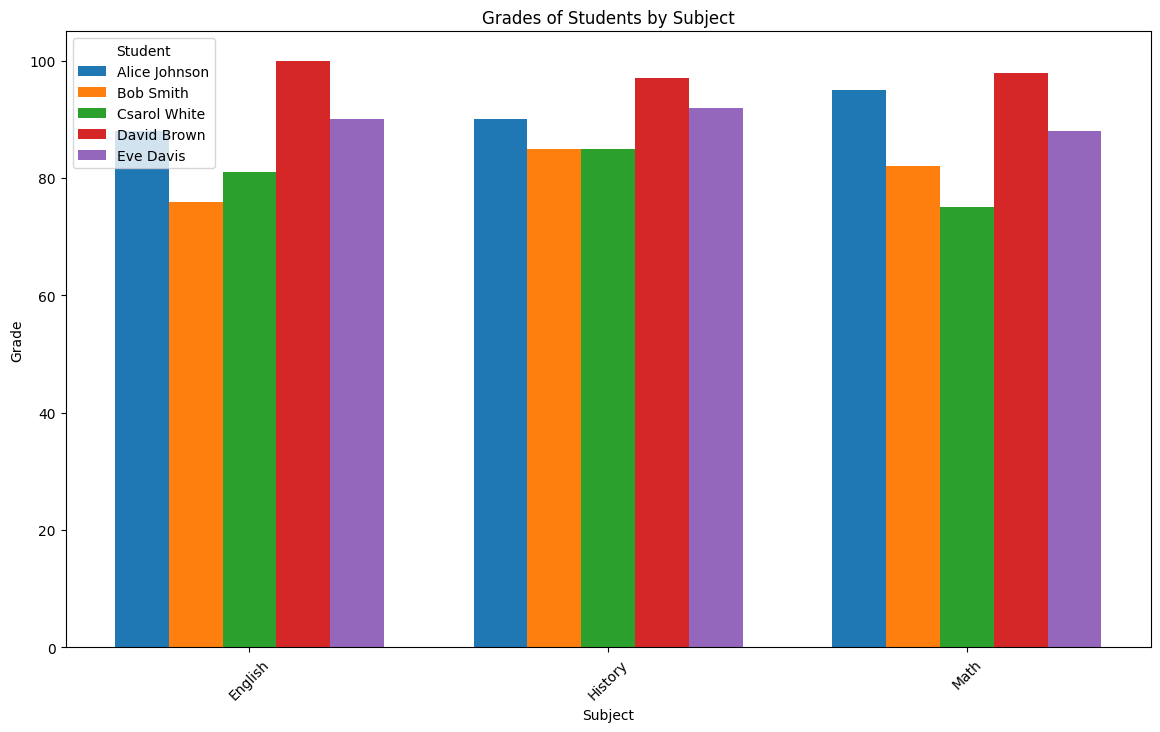

In [107]:
import numpy as np

plt.figure(figsize=(14, 8))

subjects = dftable.index
students = dftable.columns
num_subjects = len(subjects)
num_students = len(students)

bar_width = 0.15
bar_positions = np.arange(num_subjects)


for i, student in enumerate(students):
    plt.bar(
        bar_positions + i * bar_width,
        dftable[student],
        bar_width,
        label=student
    )

plt.xlabel('Subject')
plt.ylabel('Grade')
plt.title('Grades of Students by Subject')
plt.xticks(bar_positions + bar_width * (num_students / 2 - 0.5), subjects, rotation=45)
plt.legend(title='Student')
plt.show()